In [ ]:
import imageio
import numpy as np

img = imageio.imread('flower.jpeg')
r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]


img_r = np.stack((r, np.zeros_like(r), np.zeros_like(r)), axis=2)
img_g = np.stack((np.zeros_like(g), g, np.zeros_like(g)), axis=2)
img_b = np.stack((np.zeros_like(b), np.zeros_like(b), b), axis=2)

imageio.imwrite('red.png', img_r.astype(np.uint8))
imageio.imwrite('green.png', img_g.astype(np.uint8))
imageio.imwrite('blue.png', img_b.astype(np.uint8))


C:\Users\adsmin\AppData\Local\Temp\ipykernel_24000\445442725.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('flower.jpeg')


In [ ]:
import imageio

img = imageio.imread('balloons_noisy.png')


img_bgr = img[:, :, ::-1]  
img_grb = img[:, :, [1, 0, 2]] 
img_brg = img[:, :, [2, 0, 1]]  

imageio.imwrite('bgr.jpg', img_bgr)
imageio.imwrite('grb.jpg', img_grb)
imageio.imwrite('brg.jpg', img_brg)


C:\Users\adsmin\AppData\Local\Temp\ipykernel_24000\166938655.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('balloons_noisy.png')


In [22]:
import cv2

img = cv2.imread('bird.png')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

cv2.imwrite('h.jpg', h)
cv2.imwrite('s.jpg', s)
cv2.imwrite('v.jpg', v)


True

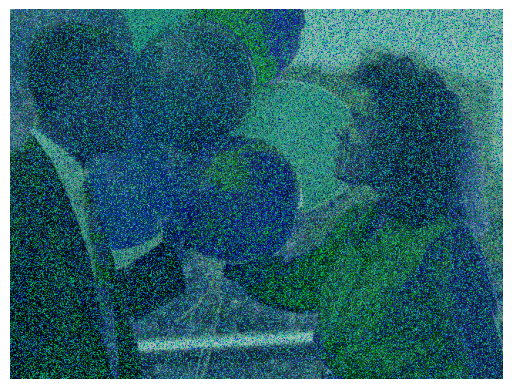

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = cv2.imread('balloons_noisy.png')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV).astype(np.float32)

hsv[:, :, 0] = hsv[:, :, 0] / 3
hsv[:, :, 2] = hsv[:, :, 2] * 0.75

hsv[:, :, 0] = np.clip(hsv[:, :, 0], 0, 179)
hsv[:, :, 2] = np.clip(hsv[:, :, 2], 0, 255)

hsv = hsv.astype(np.uint8)
result = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite('hsv.png', result)

plt.imshow(result)
plt.axis('off')
plt.show()


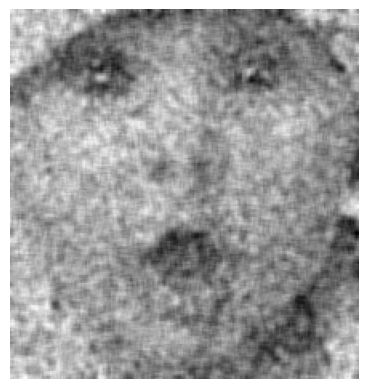

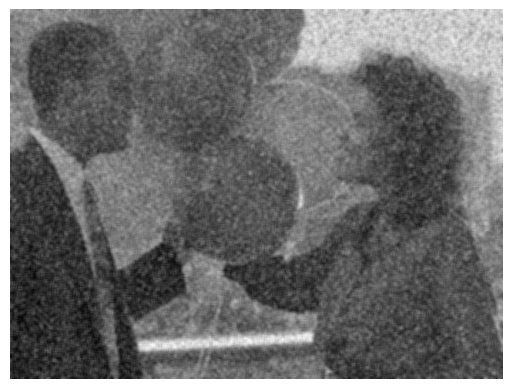

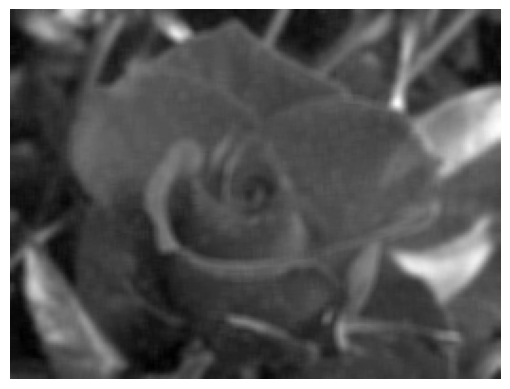

Đã lọc xong tất cả ảnh trong thư mục.


In [2]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import os
import matplotlib.pyplot as plt
from PIL import Image

# Thư mục chứa ảnh gốc và nơi lưu ảnh đã lọc
input_folder = 'exercise'
output_folder = 'mean_filter'
os.makedirs(output_folder, exist_ok=True)
# Bộ lọc trung bình 5x5
k = np.ones((5, 5)) / 25
# Duyệt qua từng file ảnh trong thư mục
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        # Đọc ảnh grayscale
        a = iio.imread(input_path,mode ='F')

        # Áp dụng bộ lọc trung bình
        b = sn.convolve(a, k).astype(np.uint8)

        # Lưu ảnh sau khi lọc
        iio.imsave(output_path, b)

        # Hiển thị ảnh kết quả (tuỳ chọn)
        plt.imshow(b, cmap='gray')
        plt.axis('off')
        plt.show()

print("Đã lọc xong tất cả ảnh trong thư mục.")
